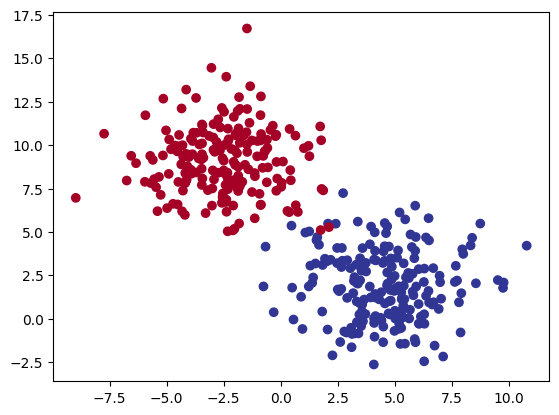

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=400,
                  n_features=2,
                  centers=2,
                  cluster_std=2,
                  random_state=42)

plt.scatter(X.transpose()[0],
            X.transpose()[1],
            c=y,
            cmap="RdYlBu")
plt.show()

In [ ]:
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")

Length of X: 400
Length of y: 400


In [ ]:
train_size = int(len(X) * 0.8)

X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [ ]:
print(f"Length of X_train: {len(X_train)}")
print(f"Length of X_test: {len(X_test)}")

Length of X_train: 320
Length of X_test: 80


In [ ]:
class KNNClassifier():
  def __init__(self,
               k:int = 5):
    self.k = k

  def distance(self, point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

  def most_common(self, lst):
    return max(set(lst), key=lst.count)

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X):
    neighbors = []
    for x in X:
      # Get Euclidean Distances
      distances = self.distance(x, self.X_train)

      # Sort by distance
      y_sorted = [i[1] for i in sorted(zip(distances, self.y_train))]

      # Get k-nearest neighbors
      neighbors.append(y_sorted[:self.k])

    return list(map(self.most_common, neighbors))

In [ ]:
model = KNNClassifier(k=1)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

test_acc = np.mean(y_preds == y_test)
print(f"Test Accuracy: {test_acc:.6f}")

Test Accuracy: 0.987500


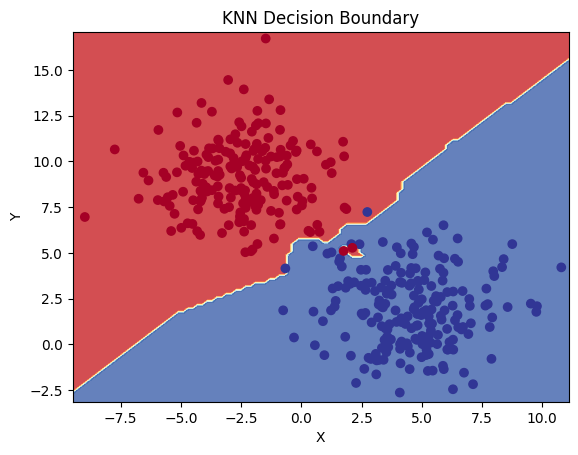

In [ ]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('KNN Decision Boundary')
plt.show()